In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
color = sns.color_palette()
pd.options.mode.chained_assignment = None  # default='warn'

In [78]:
df = pd.read_csv("experiment_with_lat_and_lng_and_num_cofe.csv") 

In [79]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS,lat,lng,num_cafe_1000_meters,num_cafe_500_meters
0,3,FLATBUSH-LEFFERTS GARDEN,01 ONE FAMILY DWELLINGS,1,5050,2,S0,625 ROGERS AVENUE,11225.0,1.0,2.0,3.0,3700.0,2128.0,1905.0,1,S0,1925000,2019-02-05,brooklyn,625 ROGERS AVENUE NYC,40.656321,-73.952859,20,8
1,4,HOWARD BEACH,01 ONE FAMILY DWELLINGS,1,14069,139,A1,85-11 164TH AVENUE,11414.0,1.0,0.0,1.0,4000.0,2192.0,1965.0,1,A1,730000,2019-07-02,queens,85-11 164TH AVENUE NYC,40.650046,-73.844749,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facc621a0b8>]],
      dtype=object)

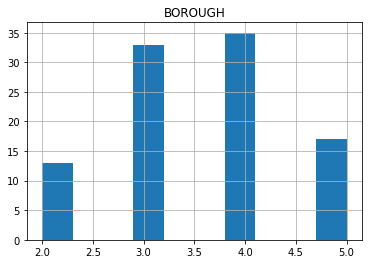

In [83]:
df.hist(column='BOROUGH')

In [6]:
example1 = "api-key_geocoding.txt"
file1 = open(example1, "r")

In [7]:
API_KEY = file1.read()

In [8]:
import json
import urllib.request

In [9]:
URL_near_by_search = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [48]:
def get_near_by_search(lat, lng, radius):
    location = f"{lat},{lng}"
    radius = radius
    # Join the parts of the URL together into one string.
    params = urllib.parse.urlencode(
         {
          "query": "police",
          "opennow": "true",
          "location": location,
          "radius": radius,
          "type": "police",
          "key": API_KEY,
        }
    )
    url = f"{URL_near_by_search}?{params}"
    result = json.load(urllib.request.urlopen(url))

    if result["status"] in ["OK", "ZERO_RESULTS"]:
        return result["results"]

    raise Exception(result["error_message"])

In [49]:
results = get_near_by_search(40.650046	, -73.94875689999999, 2000)

In [50]:
print(results)

[{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 40.6487865, 'lng': -73.9501183}, 'viewport': {'northeast': {'lat': 40.6501921802915, 'lng': -73.94871276970848}, 'southwest': {'lat': 40.6474942197085, 'lng': -73.9514107302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/police-71.png', 'name': 'New York City Police Department - 67th Precinct', 'opening_hours': {'open_now': True}, 'photos': [{'height': 3120, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/105710762402297078416">Carl Mclaughlin</a>'], 'photo_reference': 'CkQ0AAAAjPTaaRRM__N8pmmMKn27niCPb8sbz9DAPLsyFzpenMzxGa0c25rr_Ki3HPFJ6HF-BX3A7lokshXhr_N2qJHZOxIQwIlGaIuRg3qS6oR2todsFxoUmw5IN83_qffA_Gcl3gQD2zopnCk', 'width': 4160}], 'place_id': 'ChIJPQt_BkNbwokR3vno0MVCQLM', 'plus_code': {'compound_code': 'J2XX+GX Brooklyn, NY, USA', 'global_code': '87G8J2XX+GX'}, 'rating': 2.5, 'reference': 'ChIJPQt_BkNbwokR3vno0MVCQLM', 'scope': 'GOOGLE', 'types': ['police', 'point_of_interes

In [51]:
len(results)

2

In [52]:
df_5 = df.head(20)

In [ ]:
df_5

In [57]:
ans = []
for index,row in df_5.iterrows():
    lat, lng = row['lat'], row['lng']
    results = get_near_by_search(lat, lng, 4000)
    ans.append(len(results))

In [58]:
print(ans)

[7, 2, 0, 2, 2, 4, 2, 2, 1, 5, 2, 0, 7, 2, 3, 3, 0, 2, 6, 3]


In [59]:
df_5['num_police_4000_meters'] = ans

In [63]:
df_5 = df_5.drop(columns=['num_police_2000_meters'])

In [ ]:
df_5

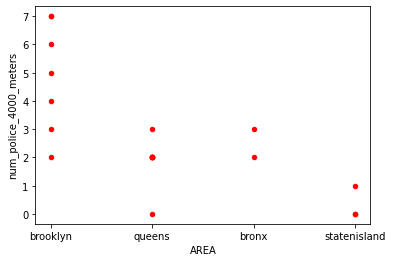

In [68]:
df_5.plot(kind='scatter',x='AREA',y='num_police_4000_meters',color='red')
plt.show()

In [72]:
ans = []
for index,row in df.iterrows():
    lat, lng = row['lat'], row['lng']
    results = get_near_by_search(lat, lng, 4000)
    ans.append(len(results))

In [74]:
df['num_police_4000_meters'] = ans

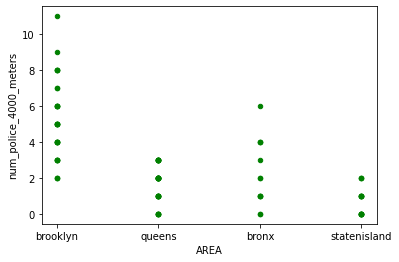

In [75]:
df.plot(kind='scatter',x='AREA',y='num_police_4000_meters',color='green')
plt.show()

In [76]:
df.head(30)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS,lat,lng,num_cafe_1000_meters,num_cafe_500_meters,num_police_2000_meters,num_police_4000_meters
0,3,FLATBUSH-LEFFERTS GARDEN,01 ONE FAMILY DWELLINGS,1,5050,2,S0,625 ROGERS AVENUE,11225.0,1.0,2.0,3.0,3700.0,2128.0,1905.0,1,S0,1925000,2019-02-05,brooklyn,625 ROGERS AVENUE NYC,40.656321,-73.952859,20,8,2,7
1,4,HOWARD BEACH,01 ONE FAMILY DWELLINGS,1,14069,139,A1,85-11 164TH AVENUE,11414.0,1.0,0.0,1.0,4000.0,2192.0,1965.0,1,A1,730000,2019-07-02,queens,85-11 164TH AVENUE NYC,40.650046,-73.844749,2,0,0,2
2,4,BAYSIDE,02 TWO FAMILY DWELLINGS,1,5952,20,B2,215-29 23RD ROAD,11360.0,2.0,0.0,2.0,3232.0,3078.0,1970.0,1,B2,800000,2019-07-05,queens,215-29 23RD ROAD NYC,40.782845,-73.774405,3,2,0,0
3,2,WAKEFIELD,02 TWO FAMILY DWELLINGS,1,5009,1,B3,1800 BUSSING AVENUE,10466.0,2.0,0.0,2.0,2505.0,2193.0,1930.0,1,B3,310000,2019-06-14,bronx,1800 BUSSING AVENUE NYC,40.894052,-73.848705,5,1,0,2
4,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,759,10,C0,22-45 47TH STREET,11105.0,3.0,0.0,3.0,3000.0,2740.0,1965.0,1,C0,1425000,2019-04-04,queens,22-45 47TH STREET NYC,40.768648,-73.902715,20,4,2,2
5,3,DYKER HEIGHTS,02 TWO FAMILY DWELLINGS,1,6320,63,B1,1137 85TH STREET,11228.0,2.0,0.0,2.0,4000.0,2117.0,1970.0,1,B1,1500000,2019-04-01,brooklyn,1137 85TH STREET NYC,40.616898,-74.016540,8,1,1,4
6,4,HOLLISWOOD,01 ONE FAMILY DWELLINGS,1,7271,54,A1,81-15 189TH STREET,11423.0,1.0,0.0,1.0,4000.0,1680.0,1940.0,1,A1,990000,2019-01-28,queens,81-15 189TH STREET NYC,40.727294,-73.778907,6,2,1,2
7,4,RIDGEWOOD,02 TWO FAMILY DWELLINGS,1,3493,52,B1,62-76 60TH PLACE,11385.0,2.0,0.0,2.0,2175.0,2160.0,1901.0,1,B1,1145000,2019-10-25,queens,62-76 60TH PLACE NYC,40.711533,-73.903460,14,4,0,2
8,5,BULLS HEAD,02 TWO FAMILY DWELLINGS,1,1621,43,B2,49 KINGSBRIDGE AVENUE,10314.0,2.0,0.0,2.0,2450.0,1326.0,1981.0,1,B2,598000,2019-05-17,statenisland,49 KINGSBRIDGE AVENUE NYC,40.616938,-74.165053,2,0,1,1
9,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,7744,39,A9,957 EAST 40TH STREET,11210.0,1.0,0.0,1.0,1800.0,1372.0,1910.0,1,A9,500000,2019-05-17,brooklyn,957 EAST 40TH STREET NYC,40.631868,-73.937716,9,0,1,5


In [84]:
df.to_csv('experiment_lat_lng_cofe_police.csv', index=False)